In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import Image

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_excel(r'C:\Users\raflg\Downloads\Databases\Equipe.xls')
df

,numsemaine,nomSeance,dateSeance,duree,sportif,marqueur1,marqueur2,marqueur3,marqueur4,marqueur5,...,marqueur9,marqueur10,marqueur11,marqueur12,marqueur13,marqueur14,marqueur15,marqueur16,marqueur17,marqueur18
0,2104,Seance individuelle,2021-01-30,35,Joueur-1,3.7,2.3,5.4,3.7,0.0,...,2.6,2.4,2.2,2.1,2.0,2.0,3.3,0.0,2.3,0.0
1,2104,Seance collective,2021-01-29,50,Joueur-1,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,2104,Seance individuelle,2021-01-28,80,Joueur-1,4.1,2.0,6.5,5.0,0.0,...,2.4,4.3,1.7,2.4,1.9,2.0,4.0,0.0,2.2,0.0
3,2053,Seance individuelle,2020-12-30,45,Joueur-1,3.6,2.4,5.7,4.0,0.0,...,0.0,0.0,0.0,3.4,2.1,2.0,3.5,0.0,2.2,0.0
4,2046,Seance collective,2020-11-13,60,Joueur-1,3.6,2.3,3.4,2.2,3.6,...,2.3,2.2,2.4,1.9,1.5,1.9,2.8,0.0,2.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,2027,Seance collective,2020-07-03,65,Joueur-29,1.0,0.0,1.0,0.7,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7776,2027,Seance collective,2020-07-02,60,Joueur-29,1.0,1.0,1.3,1.6,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7777,2027,Seance collective,2020-07-01,280,Joueur-29,9.5,0.0,4.0,2.9,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,8.4,1.0,1.0,0.0
7778,2027,Seance collective,2020-06-30,70,Joueur-29,1.0,1.0,1.4,1.8,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


# Visualisation

In [3]:
df.loc[(df['nomSeance'] == 'Seance individuelle') | (df['nomSeance'] == 'Seance collective'), 'nomSeance'] = 'Seance'

In [4]:
marqueurs = ['marqueur1', 'marqueur2', 'marqueur3', 'marqueur4', 'marqueur5', 'marqueur6', 'marqueur7', 'marqueur8', 
             'marqueur9', 'marqueur10', 'marqueur11', 'marqueur12', 'marqueur13', 'marqueur14', 'marqueur15',
             'marqueur16', 'marqueur17', 'marqueur18']

Joueurs = df.sportif.unique().tolist()

In [5]:
agg_func = {'duree' : 'sum'}

for m in marqueurs:
    agg_func[m] = 'max'

In [6]:
df_plot = df.groupby(['dateSeance', 'sportif', 'nomSeance', 'numsemaine'], as_index=False).agg(agg_func)
df_plot

,dateSeance,sportif,nomSeance,numsemaine,duree,marqueur1,marqueur2,marqueur3,marqueur4,marqueur5,...,marqueur9,marqueur10,marqueur11,marqueur12,marqueur13,marqueur14,marqueur15,marqueur16,marqueur17,marqueur18
0,2020-06-29,Joueur-1,Seance,2027,70,4.9,1.0,1.3,1.6,5.2,...,0.0,4.6,7.3,0.0,3.3,0.0,1.7,1.0,0.0,0.0
1,2020-06-29,Joueur-11,Seance,2027,70,3.5,3.3,1.0,2.7,3.8,...,2.1,2.1,2.6,2.9,1.8,1.7,2.6,1.0,2.0,0.0
2,2020-06-29,Joueur-12,Seance,2027,70,2.7,1.3,1.0,4.6,4.9,...,1.0,2.2,3.8,7.6,1.0,1.0,4.1,1.0,1.0,0.0
3,2020-06-29,Joueur-13,Seance,2027,70,3.2,1.0,1.0,2.1,2.0,...,1.0,2.5,2.0,6.3,1.0,1.2,8.6,1.0,1.2,0.0
4,2020-06-29,Joueur-14,Seance,2027,70,4.3,1.1,4.8,4.5,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.8,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6240,2021-04-10,Joueur-9,Seance,2114,25,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
6241,2021-04-11,Joueur-11,Seance,2114,45,4.9,1.0,1.0,3.6,1.0,...,1.0,1.6,4.4,4.5,3.9,1.5,5.8,0.0,4.5,0.0
6242,2021-04-12,Joueur-11,Seance,2115,60,4.3,1.0,1.0,2.2,1.0,...,1.0,1.6,2.9,2.7,3.3,1.6,3.2,0.0,1.0,0.0
6243,2021-04-12,Joueur-16,Seance,2115,45,1.0,1.0,2.4,2.7,2.9,...,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


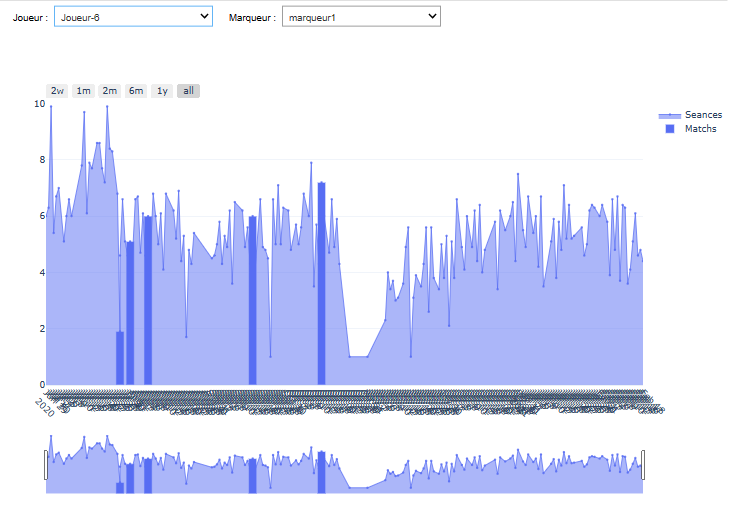

In [8]:
joueurs_dp = widgets.Dropdown(description='Joueur :',
                           value=Joueurs[0],
                           options=Joueurs
                          )

marqueurs_dp = widgets.Dropdown(description='Marqueur :', 
                                value=marqueurs[0],
                                options=marqueurs
                               )

trace1 = go.Scatter(x=df_plot.loc[df_plot['sportif']==Joueurs[0],'dateSeance'], 
                    y=df_plot.loc[df_plot['sportif']==Joueurs[0], marqueurs[0]],
                    mode='lines+markers', fill='tozeroy', marker_color='#576DF3',
                    marker=dict(opacity=0.8,size=3), line=dict(width=1),
                    name='Seances')

trace2 = go.Bar(x=df_plot.loc[(df_plot['sportif']==Joueurs[0])&(df_plot['nomSeance']=='Match'),'dateSeance'],
                y=df_plot.loc[(df_plot['sportif']==Joueurs[0])&(df_plot['nomSeance']=='Match'), marqueurs[0]],
                marker_color='#576DF3',
                name='Matchs', opacity=1)

g = go.FigureWidget(data=[trace1,trace2], layout=go.Layout(barmode='overlay'))

def response(change):
    x1 = df_plot.loc[df_plot['sportif']==joueurs_dp.value,'dateSeance']
    y1 = df_plot.loc[df_plot['sportif']==joueurs_dp.value, marqueurs_dp.value]
    x2 = df_plot.loc[(df_plot['sportif']==joueurs_dp.value)&(df_plot['nomSeance']=='Match'), 'dateSeance']
    y2 = df_plot.loc[(df_plot['sportif']==joueurs_dp.value)&(df_plot['nomSeance']=='Match'), marqueurs_dp.value]
    
    
    with g.batch_update():
        g.data[0].x = x1
        g.data[0].y = y1
        g.data[1].x = x2
        g.data[1].y = y2
        g.layout.barmode = 'overlay'

joueurs_dp.observe(response)
marqueurs_dp.observe(response)

g.update_layout(width=1000, height=700,
                  yaxis=dict(range=[0,10]),
                  template='plotly_white',
                  autosize=False)

g.update_xaxes(tickangle=45, dtick='L1')

g.update_layout(xaxis=dict(rangeselector=dict(buttons=
                                              list([dict(count=14, label='2w', step='day'),
                                                    dict(count=1, label='1m', step='month'),
                                                    dict(count=2, label='2m', step='month'),
                                                    dict(count=6, label='6m', step='month'),
                                                    dict(count=1, label='1y', step='year'),
                                                    dict(step='all')])
                                             ), rangeslider=dict( visible=True), type="date"))

container = widgets.HBox([joueurs_dp, marqueurs_dp])
widgets.VBox([container, g])

Image(filename='monitoring2-1.PNG')

# Standardisation (Robust scaler car nous avons des marqueurs qualitatifs)

In [9]:
from sklearn.preprocessing import RobustScaler

### Standardisation normale à la moyenne

In [10]:
X = df.iloc[:, 5:]

scaler = RobustScaler()
X_z = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_z, columns=marqueurs)
df_scaled

,marqueur1,marqueur2,marqueur3,marqueur4,marqueur5,marqueur6,marqueur7,marqueur8,marqueur9,marqueur10,marqueur11,marqueur12,marqueur13,marqueur14,marqueur15,marqueur16,marqueur17,marqueur18
0,0.075,1.3,0.179487,-0.300000,-0.666667,-1.428571,1.222222,0.818182,1.6,1.4,0.40,0.6875,1.0,1.0,-0.035714,0.0,1.3,0.0
1,-0.600,0.0,-0.948718,-1.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.20,0.0000,0.0,0.0,-0.857143,0.0,0.0,0.0
2,0.175,1.0,0.461538,0.133333,-0.666667,-1.428571,1.222222,-0.909091,1.4,3.3,0.15,0.8750,0.9,1.0,0.214286,0.0,1.2,0.0
3,0.050,1.4,0.256410,-0.200000,-0.666667,-1.428571,-1.111111,-0.909091,-1.0,-1.0,-0.70,1.5000,1.1,1.0,0.035714,0.0,1.2,0.0
4,0.050,1.3,-0.333333,-0.800000,1.733333,1.857143,0.777778,1.545455,1.3,1.2,0.50,0.5625,0.5,0.9,-0.214286,0.0,1.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,-0.600,-1.0,-0.948718,-1.300000,0.000000,0.000000,0.000000,-0.909091,-1.0,0.0,-0.20,0.0000,0.0,0.0,-0.857143,1.0,0.0,0.0
7776,-0.600,0.0,-0.871795,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.20,0.0000,0.0,0.0,-0.857143,1.0,0.0,0.0
7777,1.525,-1.0,-0.179487,-0.566667,-0.666667,-1.428571,0.000000,0.000000,0.0,0.0,-0.20,0.0000,0.0,0.0,1.785714,1.0,0.0,0.0
7778,-0.600,0.0,-0.846154,-0.933333,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.20,0.0000,0.0,0.0,-0.857143,1.0,0.0,0.0


# Corrélation/Covariance
### Avec des données standardisées, la corrélation et la covariance sont identiques
#### Pre-processing avant le Machine learning (ML). Permet d'avoir une première visualisation d'ensemble et d'assurer des critères avant toute technique de ML : avoir des marqueurs avec une corrélation, ne pas avoir trop de marqueurs avec une corrélation trop forte (1)

## Corr/Cov

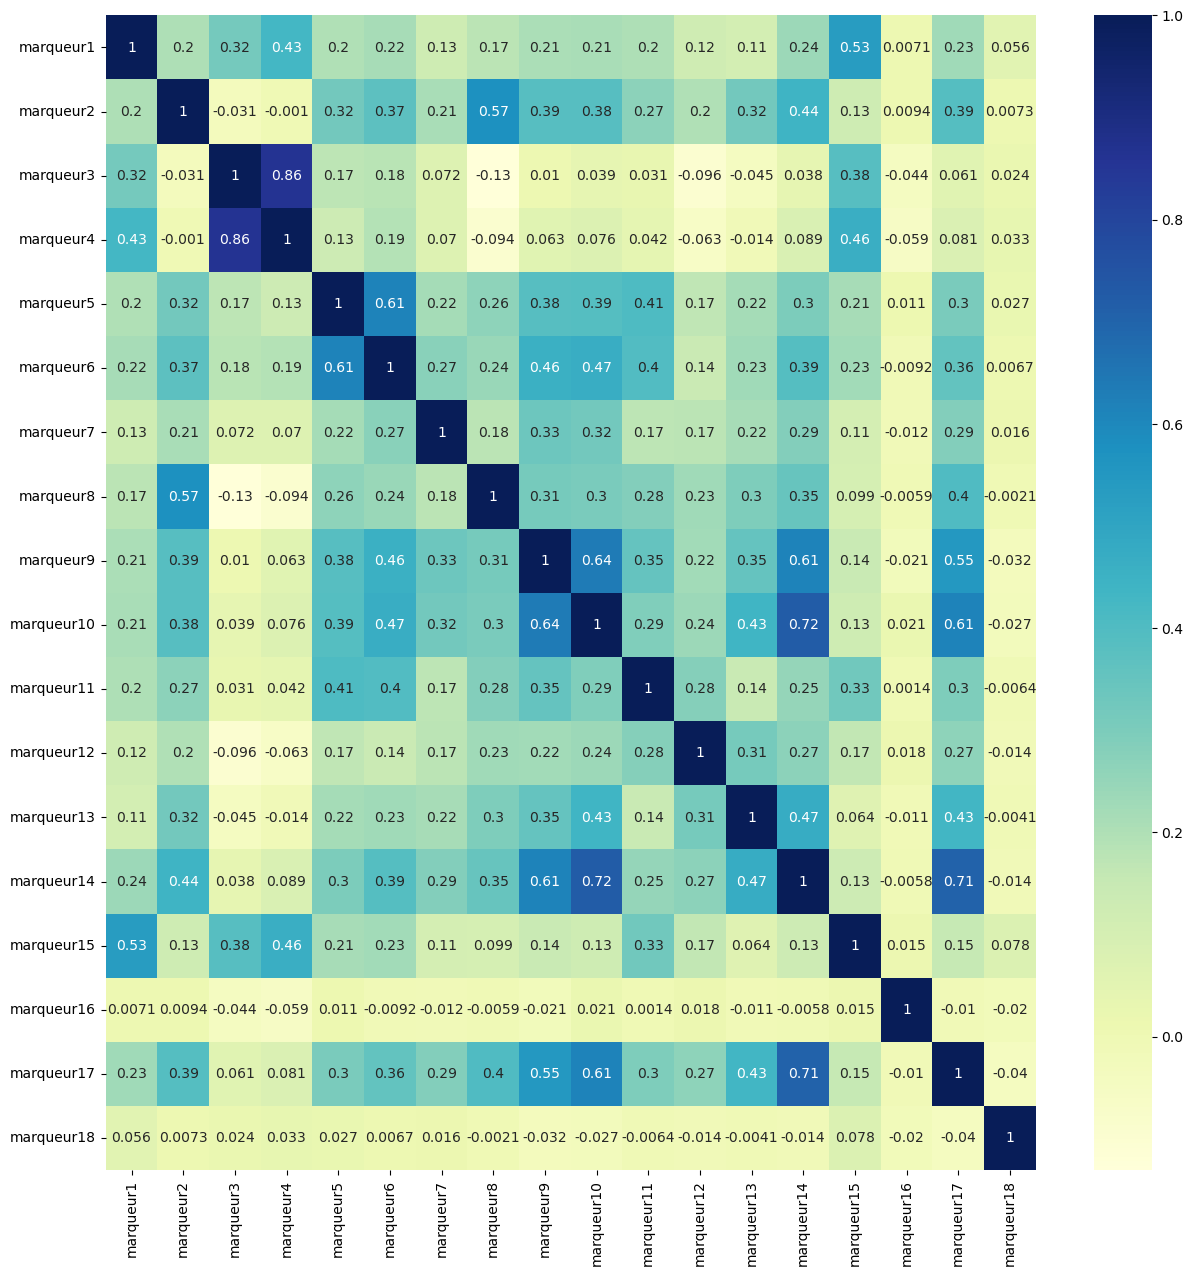

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_scaled.corr(), annot=True, cmap='YlGnBu')
plt.show()